#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

<br>

## 1. Data loading & preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing # Scikit-learn (sklearn)

In [ ]:
# datasets.load # tab

In [6]:
# datasets.load_boston() #.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# print(datasets.load_boston()['DESCR'])

In [7]:
# datasets.load_boston().data

In [3]:
df = pd.read_excel('../Part5/boston_house_data.xlsx', index_col=0) # 엑셀 파일 읽기
df.head() # 머리를 영어로?

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
x_data = df
y_data = pd.read_excel('../Part5/boston_house_target.xlsx', index_col=0) # 집의 가격 (in $1,000s)

In [6]:
sc = preprocessing.StandardScaler() # Apply standard scaling on x_data (Standardization)
x_data = sc.fit_transform(x_data)

print(x_data.shape) # 모양을 영어로?
print(y_data.shape) # 모양을 영어로?

(506, 13)
(506, 1)


<br>

## 2. Devide dataframe into X & Y -> Train X / Test X / Train Y / Test Y

In [7]:
from sklearn import model_selection

In [8]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


<br>

## 3. Build & Train the model 

In [9]:
import tensorflow as tf

# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [12]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model.add(layers.Dense(input_dim=13, units=64, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4)) # Dropout-layer

model.add(layers.Dense(units=1, activation=None)) 

/opt/anaconda3/envs/goormthon/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# "Compile" the model description (Configures the model for training)

model.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer
              loss='mean_squared_error', # MSE 
              metrics=['mean_squared_error']) # MSE

In [19]:
# "Fit" the model on training data

history = model.fit(train_data, train_label, batch_size=100, epochs=1000, validation_split=0.3, verbose=0) 

In [20]:
# "Evaluate" the model on test data

result = model.evaluate(test_data, test_label)

print('loss (mean_squared_error) :', result[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 17.9957 - mean_squared_error: 17.9957
loss (mean_squared_error) : 15.09704875946045


In [21]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

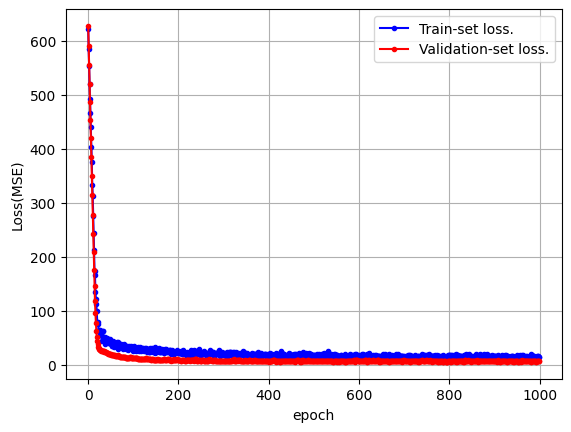

In [22]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

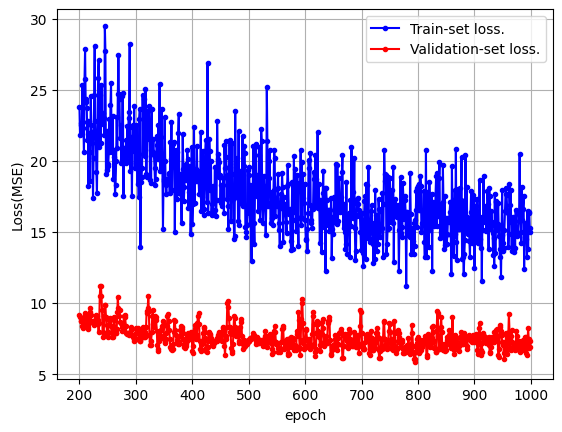

In [23]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

# epoch 200 ~ epoch 1000
plt.plot(x_len[200:], loss[200:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[200:], val_loss[200:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [24]:
# "Predict" on test data

model.predict(test_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[22.123062 ],
       [28.43988  ],
       [23.583752 ],
       [ 8.343412 ],
       [19.394306 ],
       [18.825504 ],
       [23.523054 ],
       [20.580496 ],
       [22.105148 ],
       [17.151075 ],
       [ 9.961568 ],
       [ 8.5316305],
       [15.782752 ],
       [ 7.3140326],
       [38.96579  ],
       [31.973671 ],
       [23.794956 ],
       [34.164238 ],
       [30.348837 ],
       [21.95007  ],
       [23.154856 ],
       [21.131086 ],
       [20.50395  ],
       [25.6212   ],
       [20.518213 ],
       [23.0534   ],
       [16.679384 ],
       [16.078526 ],
       [39.563515 ],
       [17.285719 ],
       [14.965217 ],
       [15.985148 ],
       [19.694756 ],
       [18.869455 ],
       [26.974955 ],
       [21.933779 ],
       [ 6.535283 ],
       [39.710884 ],
       [12.106806 ],
       [16.581747 ],
       [22.508038 ],
       [21.571373 ],
       [18.363571 ],
       [18.218122 ],
       [19.577467 ],
       [23.89299  ],
       [21.006828 ],
       [11.55

In [25]:
sample_data = np.array([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [26]:
sample_data = sc.transform(sample_data) # "transform" the sample data with fitted scaler (no "fit", just "transform")
model.predict(sample_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[23.89299]], dtype=float32)